In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('20200124_ews_observations.csv') 

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Delete one liners

In [54]:
def make_dataframe_returning_patients(df, measurements):
    patient_observations_dict = df['PatientId'].value_counts().to_dict()
    
    pat_list = {k: v for k, v in patient_observations_dict.items() if v < measurements}.keys()
    df_ret = df[~df.PatientId.isin(pat_list)]
    
    print(f"Number of patients: {df_ret.PatientId.nunique()}")
    print(f"Measurements: {df_ret.shape[0]}")
    return df_ret

In [2]:
df.head()


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [23]:
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

In [4]:
df.isnull().sum()

#pd.set_option('display.max_rows', None)
#df.LOC.unique

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [5]:
total_patients=df["PatientId"].value_counts()
total_patients
# total_patients.shape
#print(patient_value_counts)

1743    643
5797    441
1261    441
630     356
1841    351
       ... 
7700      1
1360      1
5781      1
976       1
2047      1
Name: PatientId, Length: 10136, dtype: int64

In [31]:
df_selected_feat = df[['ObservationDate','PatientId','EWS_Total','SBP','LOC','SpO2','Add_O2','HR','RR','TEMP']]
df_selected_feat

,ObservationDate,PatientId,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
0,2019-05-01 13:27:50,29,0,143.0,ALERT,96.0,False,80,18,36.6
1,2019-05-01 15:27:44,30,3,NaN,ALERT,94.0,False,83,16,36.5
2,2019-05-01 15:54:27,31,1,117.0,ALERT,95.0,False,75,14,37.3
3,2019-05-01 16:07:27,32,0,NaN,ALERT,98.0,False,85,19,37.2
4,2019-05-01 17:03:16,33,0,135.0,ALERT,97.0,False,89,14,36.1
...,...,...,...,...,...,...,...,...,...,...
171731,2020-01-02 08:57:05,20278,3,88.0,ALERT,100.0,False,72,14,36.1
171732,2020-01-02 08:58:46,20480,3,83.0,ALERT,92.0,False,79,18,36.8
171733,2020-01-02 09:03:14,2499,0,118.0,ALERT,98.0,False,82,20,36.2
171734,2020-01-02 09:03:20,20527,0,129.0,ALERT,98.0,False,70,16,36.5


In [32]:
patient1 = df_selected_feat.loc[df["PatientId"]== 1743]
#patient1.describe()

In [33]:
patient1["Add_O2"].value_counts()

True     546
False     97
Name: Add_O2, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002345C50ACA0>,
      dtype=object)

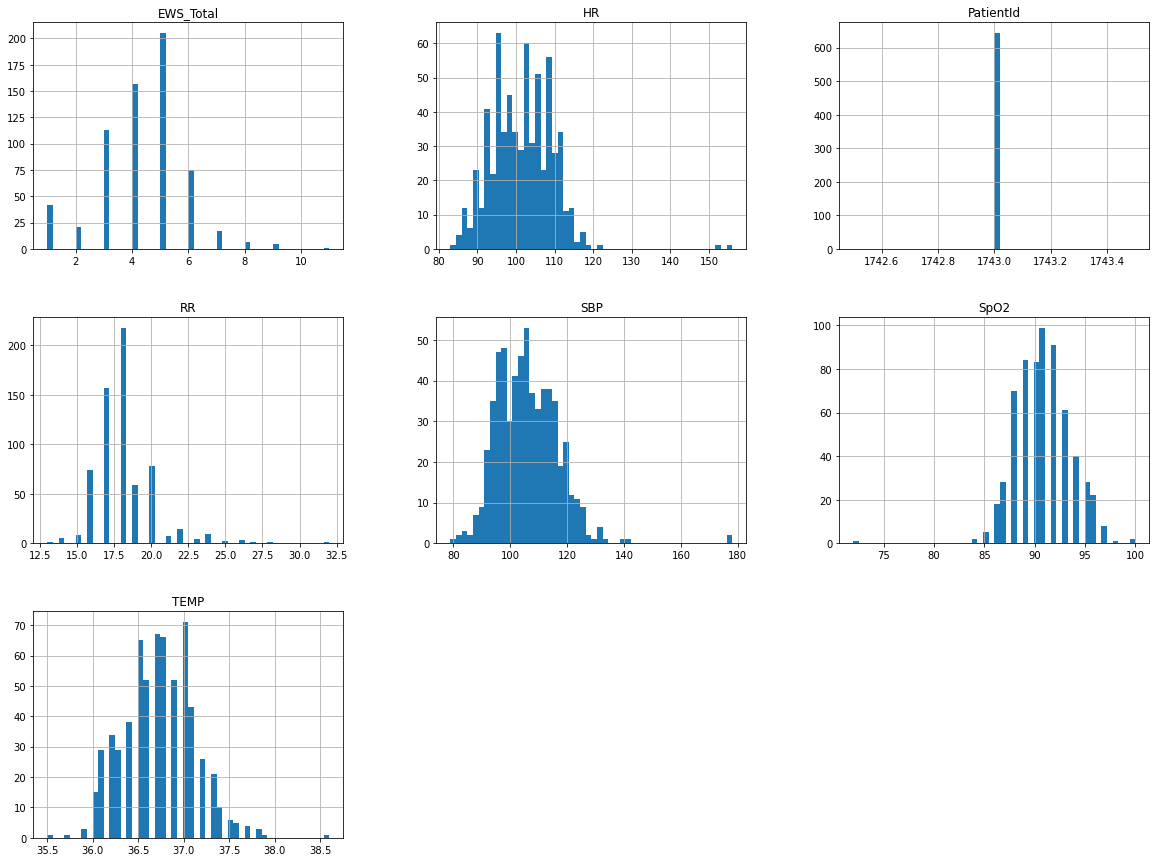

In [34]:
patient1.hist(bins=50, figsize=(20,15))

In [35]:
patient1.corr()

,PatientId,EWS_Total,SBP,SpO2,HR,RR,TEMP
PatientId,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWS_Total,NaN,1.000000,-0.483845,-0.204296,0.020570,0.166915,-0.221065
SBP,NaN,-0.483845,1.000000,0.101704,0.252820,0.136941,0.178011
SpO2,NaN,-0.204296,0.101704,1.000000,-0.031094,0.071311,0.152933
HR,NaN,0.020570,0.252820,-0.031094,1.000000,0.100005,0.302579
RR,NaN,0.166915,0.136941,0.071311,0.100005,1.000000,0.071758
TEMP,NaN,-0.221065,0.178011,0.152933,0.302579,0.071758,1.000000


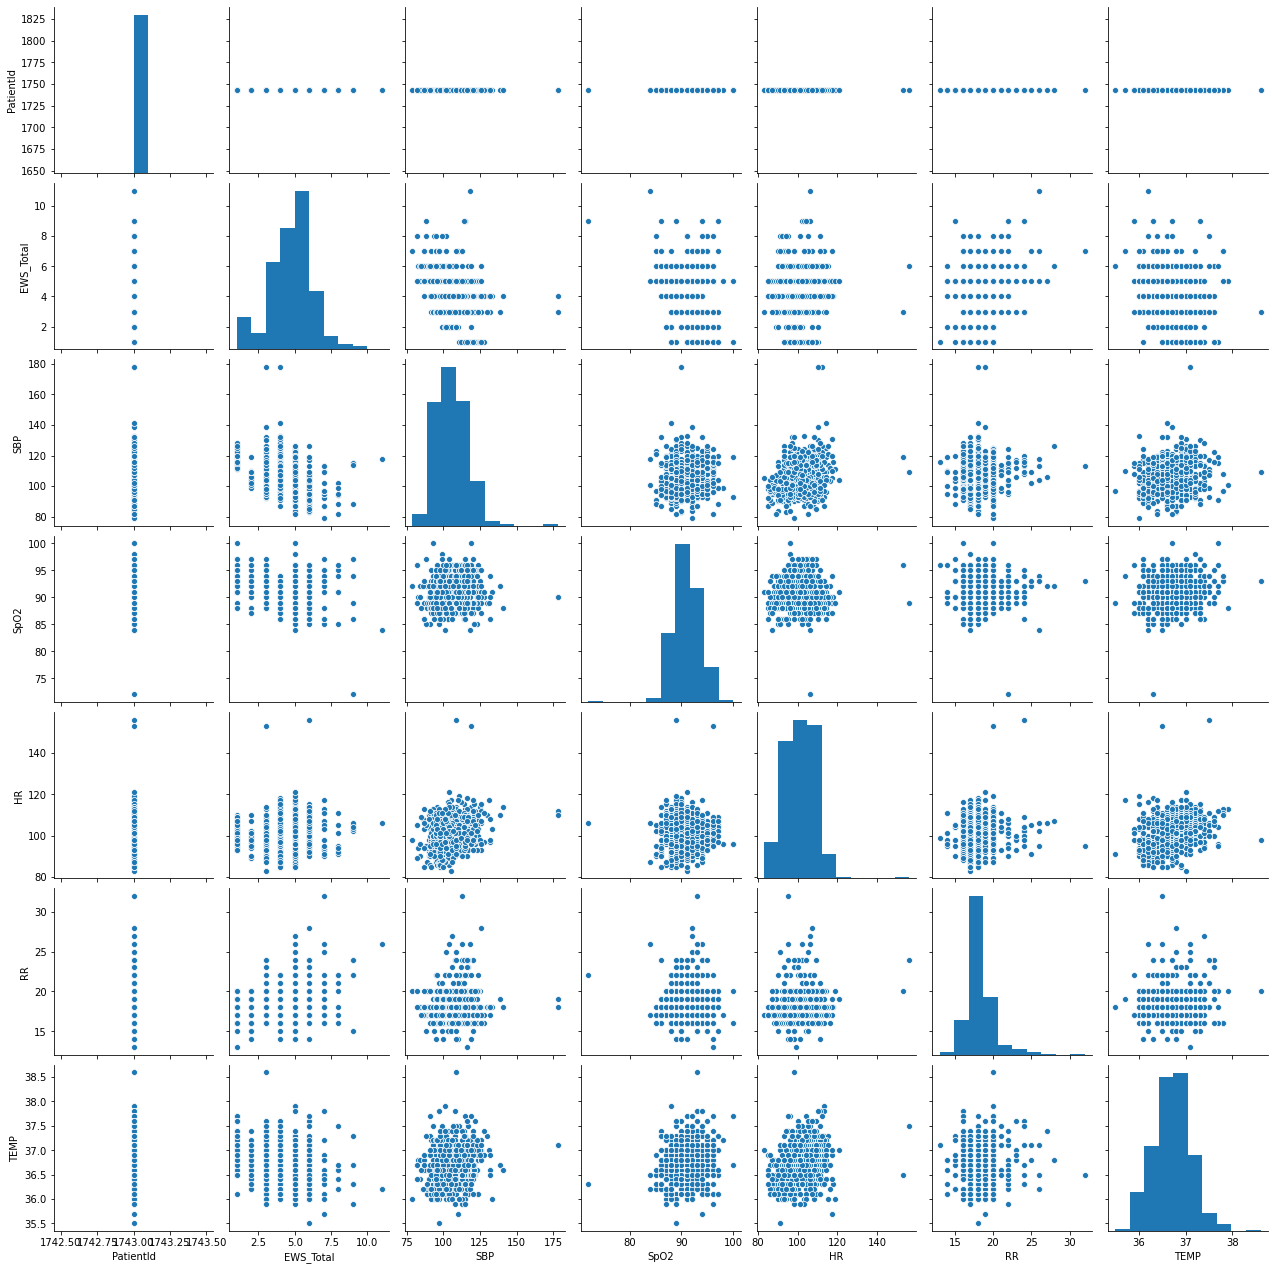

In [28]:

sns.pairplot(patient1.drop(['Add_O2'], axis=1))
#sns.pairplot(patient1, hue='Add_O2')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


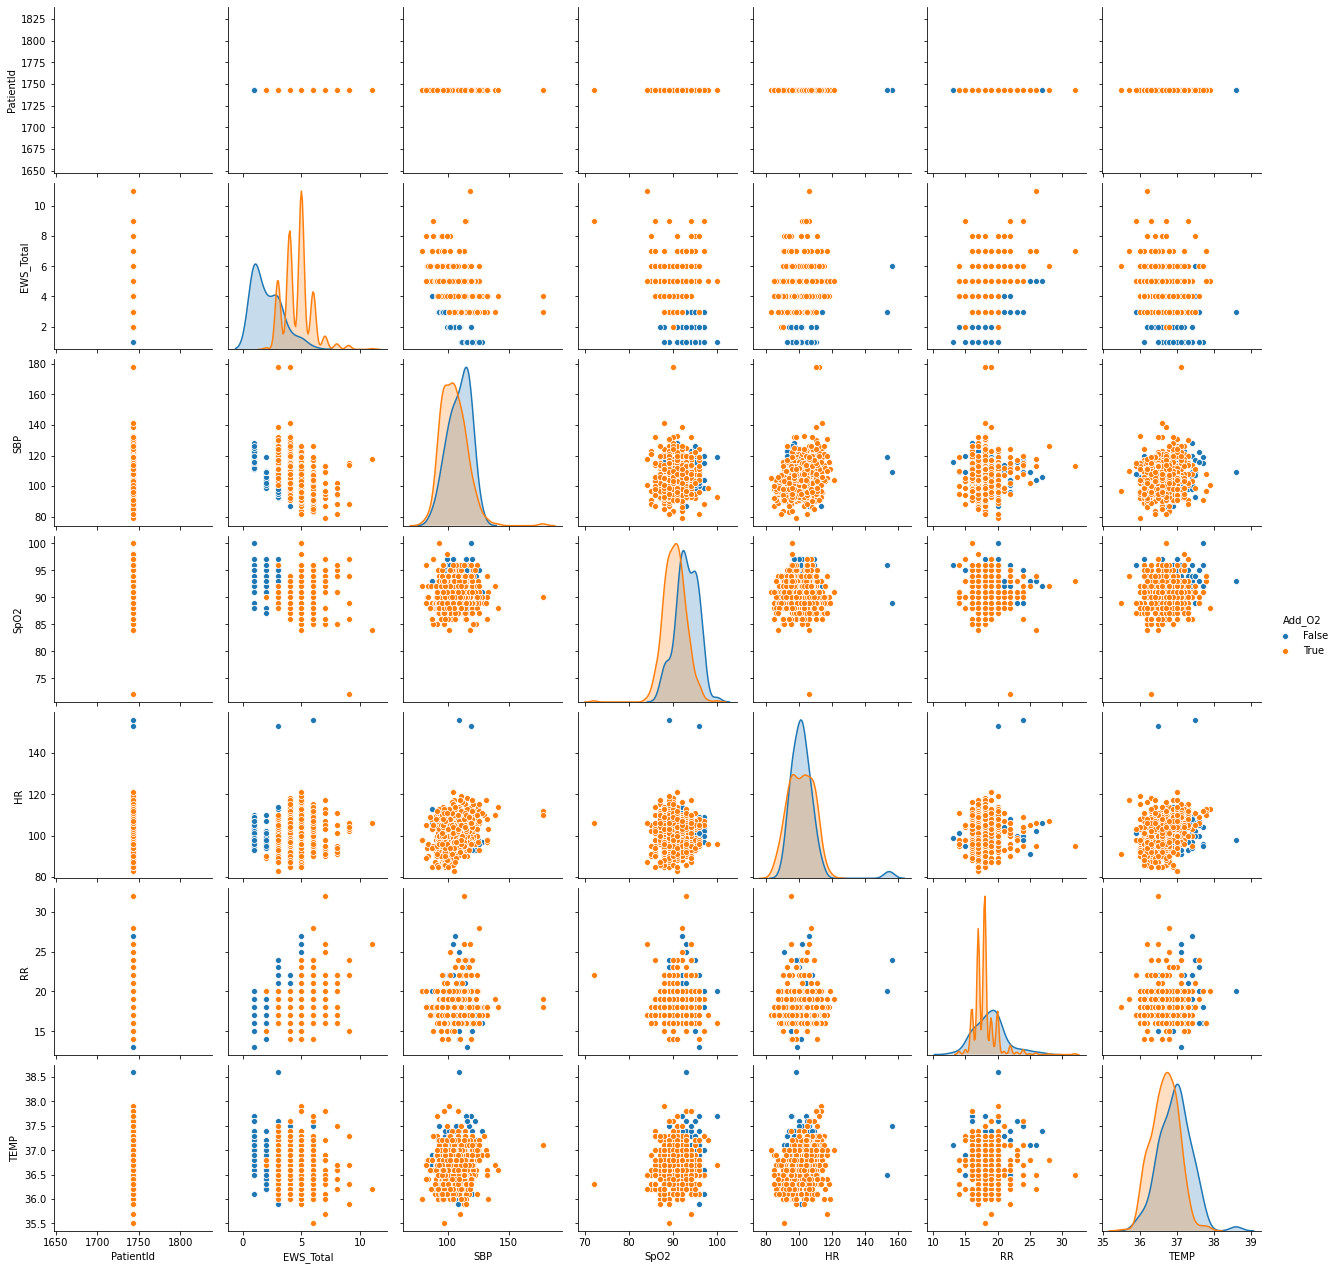

In [11]:
sns.pairplot(patient1, hue='Add_O2')

(737211.0, 737429.0)

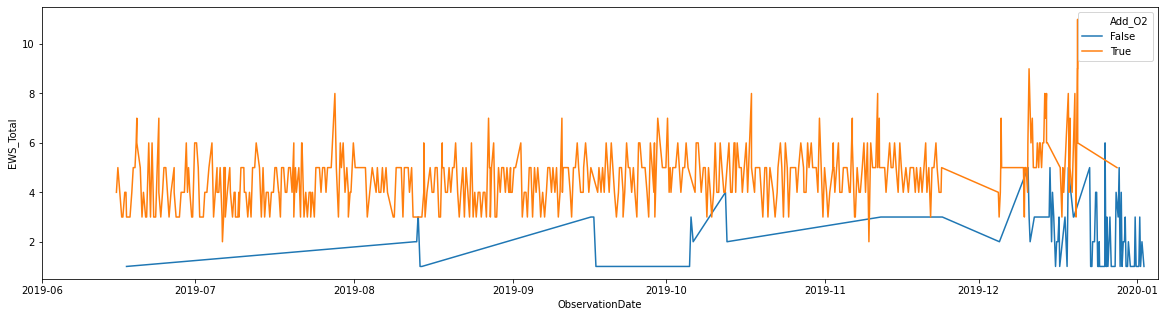

In [50]:
#df_selected_feat = df[['ObservationDate','PatientId','EWS_Total','SBP','LOC','SpO2','Add_O2','HR','RR','TEMP']]

plt.figure(figsize=(20,5))
ax = sns.lineplot(data=patient1, x='ObservationDate', y='EWS_Total', hue='Add_O2')
ax.set_xlim((pd.Timestamp('2019-06-01'), pd.Timestamp('2020-01-5')))

In [59]:
df['ObservationDate'].min()

Timestamp('2019-05-01 13:27:50')

In [60]:
df['ObservationDate'].max()

Timestamp('2020-01-02 09:03:56')

In [24]:
#normal_SBP=total_patients.loc[(df['SBP']>=90) & (df['SBP']< 120)]

In [25]:
#normal_SBP.shape

(4245,)

In [26]:
# normal_SBP=df.loc[(df['SBP']>=90) & (df['SBP']< 120)]
# normal_SBP.shape

(78819, 18)

In [55]:
filtered_patients = make_dataframe_returning_patients(df, 400)
filtered_patients = filtered_patients.sort_values(by=['PatientId'])
filtered_patients.head(5)

Number of patients: 3
Measurements: 1525


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
13868,1261,2019-06-06 05:42:27,NEWS2,3,94.0,2.0,ALERT,0,96.0,0.0,False,0.0,76,0,12,0,36.0,1
62920,1261,2019-08-13 19:12:34,NEWS2,1,105.0,1.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.8,0
119040,1261,2019-10-28 06:44:41,NEWS2,1,152.0,0.0,ALERT,0,98.0,0.0,False,0.0,99,1,18,0,36.8,0
62501,1261,2019-08-13 05:17:08,NEWS2,2,94.0,2.0,ALERT,0,98.0,0.0,False,0.0,74,0,16,0,36.7,0
62301,1261,2019-08-12 20:49:01,NEWS2,2,100.0,2.0,ALERT,0,98.0,0.0,False,0.0,72,0,17,0,36.1,0


In [57]:
filtered_patients['Obs_week'] = filtered_patients['ObservationDate'].dt.week

In [58]:
filtered_patients

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score,Obs_week
13868,1261,2019-06-06 05:42:27,NEWS2,3,94.0,2.0,ALERT,0,96.0,0.0,False,0.0,76,0,12,0,36.0,1,23
62920,1261,2019-08-13 19:12:34,NEWS2,1,105.0,1.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.8,0,33
119040,1261,2019-10-28 06:44:41,NEWS2,1,152.0,0.0,ALERT,0,98.0,0.0,False,0.0,99,1,18,0,36.8,0,44
62501,1261,2019-08-13 05:17:08,NEWS2,2,94.0,2.0,ALERT,0,98.0,0.0,False,0.0,74,0,16,0,36.7,0,33
62301,1261,2019-08-12 20:49:01,NEWS2,2,100.0,2.0,ALERT,0,98.0,0.0,False,0.0,72,0,17,0,36.1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120959,5797,2019-10-30 12:24:41,NEWS2,1,120.0,0.0,ALERT,0,95.0,0.0,False,0.0,104,1,15,0,36.2,0,44
121163,5797,2019-10-30 17:19:55,NEWS2,1,122.0,0.0,ALERT,0,95.0,0.0,False,0.0,100,1,20,0,36.8,0,44
121286,5797,2019-10-30 20:19:04,NEWS2,2,124.0,0.0,ALERT,0,95.0,0.0,False,0.0,112,2,18,0,37.3,0,44
125167,5797,2019-11-04 17:01:25,NEWS2,1,114.0,0.0,ALERT,0,97.0,0.0,False,0.0,92,1,16,0,36.9,0,45


In [62]:
filtered_patients['Obs_week'].value_counts()

45    76
44    75
39    73
52    67
38    67
37    66
46    65
51    65
50    65
43    60
41    56
40    55
42    54
29    47
25    47
33    47
47    46
28    46
26    44
27    44
30    44
31    42
35    41
34    39
36    39
32    38
49    35
1     29
48    26
24    19
23     8
Name: Obs_week, dtype: int64

In [64]:
df_1week = filtered_patients[filtered_patients['Obs_week'] == 45]
df_1week

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score,Obs_week
129043,1261,2019-11-08 21:39:03,NEWS2,1,127.0,0.0,ALERT,0,97.0,0.0,False,0.0,99,1,18,0,37.1,0,45
129453,1261,2019-11-09 11:32:33,NEWS2,3,128.0,0.0,ALERT,0,99.0,0.0,False,0.0,103,1,24,2,37.6,0,45
129603,1261,2019-11-09 15:23:12,NEWS2,1,124.0,0.0,ALERT,0,98.0,0.0,False,0.0,97,1,18,0,37.5,0,45
129825,1261,2019-11-09 21:18:09,NEWS2,1,121.0,0.0,ALERT,0,97.0,0.0,False,0.0,95,1,16,0,37.2,0,45
130070,1261,2019-11-10 06:40:32,NEWS2,0,114.0,0.0,ALERT,0,99.0,0.0,False,0.0,86,0,16,0,37.0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125655,5797,2019-11-05 08:18:24,NEWS2,2,101.0,1.0,ALERT,0,96.0,0.0,False,0.0,98,1,18,0,36.5,0,45
125284,5797,2019-11-04 19:41:50,NEWS2,1,117.0,0.0,ALERT,0,92.0,0.0,False,0.0,101,1,18,0,36.8,0,45
124971,5797,2019-11-04 12:02:03,NEWS2,2,105.0,1.0,ALERT,0,90.0,0.0,False,0.0,97,1,16,0,36.3,0,45
124807,5797,2019-11-04 07:37:05,NEWS2,2,98.0,2.0,ALERT,0,94.0,0.0,False,0.0,86,0,15,0,36.5,0,45


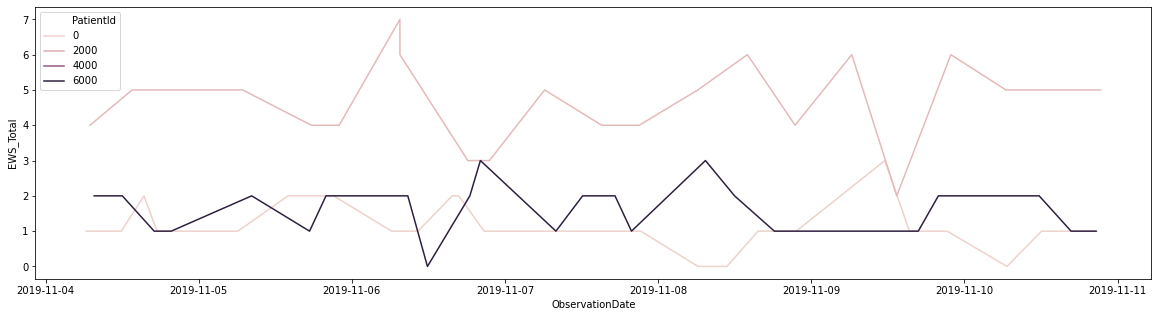

In [66]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_1week, x='ObservationDate', y='EWS_Total', hue='PatientId')

In [67]:
df_1week = df_1week.set_index('ObservationDate')

In [68]:
df_1week

,PatientId,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score,Obs_week
ObservationDate,,,,,,,,,,,,,,,,,,
2019-11-08 21:39:03,1261,NEWS2,1,127.0,0.0,ALERT,0,97.0,0.0,False,0.0,99,1,18,0,37.1,0,45
2019-11-09 11:32:33,1261,NEWS2,3,128.0,0.0,ALERT,0,99.0,0.0,False,0.0,103,1,24,2,37.6,0,45
2019-11-09 15:23:12,1261,NEWS2,1,124.0,0.0,ALERT,0,98.0,0.0,False,0.0,97,1,18,0,37.5,0,45
2019-11-09 21:18:09,1261,NEWS2,1,121.0,0.0,ALERT,0,97.0,0.0,False,0.0,95,1,16,0,37.2,0,45
2019-11-10 06:40:32,1261,NEWS2,0,114.0,0.0,ALERT,0,99.0,0.0,False,0.0,86,0,16,0,37.0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-05 08:18:24,5797,NEWS2,2,101.0,1.0,ALERT,0,96.0,0.0,False,0.0,98,1,18,0,36.5,0,45
2019-11-04 19:41:50,5797,NEWS2,1,117.0,0.0,ALERT,0,92.0,0.0,False,0.0,101,1,18,0,36.8,0,45
2019-11-04 12:02:03,5797,NEWS2,2,105.0,1.0,ALERT,0,90.0,0.0,False,0.0,97,1,16,0,36.3,0,45


In [70]:
daily_summary = pd.DataFrame()
daily_summary['EWS_AVG'] = df_1week.EWS_Total.resample('D').mean()
daily_summary['EWS_COUNT'] = df_1week.EWS_Total.resample('D').count()
daily_summary

,EWS_AVG,EWS_COUNT
ObservationDate,,
2019-11-04,2.166667,12
2019-11-05,2.555556,9
2019-11-06,2.538462,13
2019-11-07,2.000000,12
2019-11-08,2.181818,11
2019-11-09,2.555556,9
2019-11-10,1.900000,10
